In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los datasets de entremaiento y prueba

In [3]:
df1 = pd.read_csv("train.csv")
df2= pd.read_csv("test.csv")

Primeramente exploramos el dataset de entrenamiento 

In [4]:
DF = pd.concat([df1, df2], axis=0)
DF = DF.drop(columns=['surge_applied'])

In [5]:
DF.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare
0,748.0,2.75,1.0,75.00,24,6.300,105.300
1,1187.0,3.43,1.0,105.00,24,13.200,142.200
2,730.0,3.12,1.0,71.25,0,26.625,97.875
3,671.0,5.63,3.0,90.00,0,9.750,99.750
4,329.0,2.09,1.0,45.00,12,13.200,70.200


In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299534 entries, 0 to 89860
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       299534 non-null  float64
 1   distance_traveled   299534 non-null  float64
 2   num_of_passengers   299534 non-null  float64
 3   fare                299534 non-null  float64
 4   tip                 299534 non-null  int64  
 5   miscellaneous_fees  299534 non-null  float64
 6   total_fare          299534 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 18.3 MB


In [7]:
DF.describe()


,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare
count,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000,299534.000000
mean,1165.680417,5.717167,1.290985,69.736136,13.030891,15.152971,89.453417
std,4727.006306,321.516385,0.927814,84.933388,19.880049,12.590909,101.301805
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000
25%,446.000000,1.950000,1.000000,0.000000,0.000000,6.000000,0.000000
50%,706.000000,3.200000,1.000000,56.250000,9.000000,9.750000,74.700000
75%,1097.000000,5.730000,1.000000,93.750000,20.000000,26.450000,126.000000
max,86395.000000,145517.600000,9.000000,4466.250000,2500.000000,435.000000,4472.250000


Podemos observar que los datos son en general numericos. 
El proposito de este dataset es determinar la tarifa de un viaje dado, para ello entrenaremos el modelo
con las variables: duracion del viaje, distancia, numero de pasajeros, propina, otros gastos y una variable llamada sobretension. 
Dadas las caracteristicas de la asignacion, debemos tomar solo valores continuos por lo que surge_applied sera removida del analisis. Total fare es la cantidad que debemos predecir por lo que nos servira para entrenar neustro modelo. 

Ahora podemos generar el modelo. 

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
# Seleccionar las variables independientes y dependiente y tomar las primeras 100000 muestras
X = np.array(DF[['trip_duration', 'distance_traveled', 'num_of_passengers', 'tip', 'miscellaneous_fees']][:100000])#Adicionalmente
# se elimino la variable fare dado que sesga el modelo provocando un sobreajuste. 
y = np.array(DF['total_fare'][:100000])

# Reajustar la forma de 'X'
X = X.reshape(100000, 5)

# Ahora 'X' tiene la forma (100000, n), donde n es el número de variables independientes.

# Continuar con la división en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión múltiple

model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener los coeficientes y el intercepto
coeficientes = model.coef_
intercepto = model.intercept_

# Para hacer predicciones
predicciones = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predicciones) #Valor de error cuadratico medio
r2 = r2_score(y_test, predicciones)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 1987.9079403030921
R^2: 0.7636544045379505


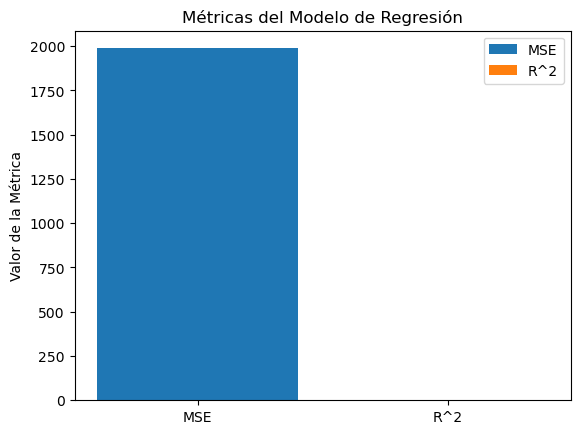

In [25]:
# Crear una lista de valores de métricas
metric_values = [mse, r2]
metric_names = ['MSE', 'R^2']
# Crear un gráfico de barras para visualizar las métricas
fig, ax = plt.subplots()
for i, metric_value in enumerate(metric_values):
    ax.bar(metric_names[i], metric_value, label=metric_names[i])

# Añadir etiquetas y leyenda
ax.set_ylabel('Valor de la Métrica')
ax.set_title('Métricas del Modelo de Regresión')
ax.legend()

# Mostrar el gráfico
plt.show()

El MSE es un poco alto y R2 no es muy bueno si miramos el contexto. 

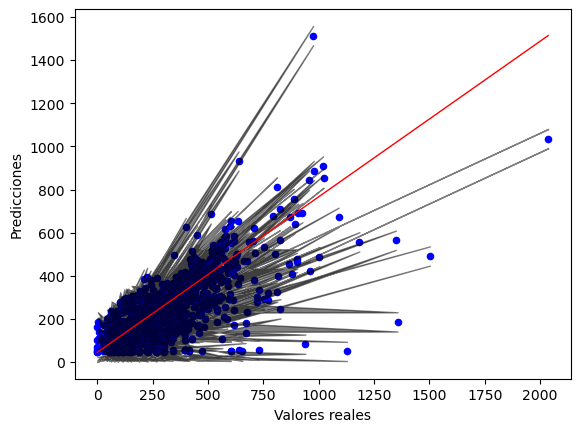

In [41]:
# Calcular los residuos 
residuos = y_test - predicciones

# Calcular la desviación estándar de los residuos
desviacion_estandar = np.std(residuos)

# Calcular las bandas de varianza (por ejemplo, +/- 1 desviación estándar)
banda_superior = predicciones + desviacion_estandar
banda_inferior = predicciones - desviacion_estandar

# Gráfico de dispersión
plt.scatter(y_test, predicciones, color='blue', s=20)

# Línea de tendencia
plt.plot([min(y_test), max(y_test)], [min(predicciones), max(predicciones)], color='red', linewidth=1)

# Bandas de varianza
plt.fill_between(y_test, banda_inferior, banda_superior, color='black', alpha=0.5)

# Añadir etiquetas
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

Obervamos que el plot muestra que que los datos presentan una desviación estandar muy alta. Ademas de que si bien siguen una cierta linealidad no es 

In [42]:
print(f'Coeficientes: {coeficientes}')
print(f'Intercepto: {intercepto}')

Coeficientes: [1.63346919e-03 8.01852746e+00 9.84019437e-01 1.52056554e+00
 1.51468357e+00]
Intercepto: 43.50118067940181


In [43]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores negativos a positivos
cv_scores = -cv_scores

# Imprimir los scores de validación cruzada
print(f'Scores de Validación Cruzada: {cv_scores}')
print(f'Promedio del Score: {cv_scores.mean()}')

Scores de Validación Cruzada: [ 2305.09510646  3982.86992315  3047.55493655  4154.23568696
 14903.52834709]
Promedio del Score: 5678.656800042613


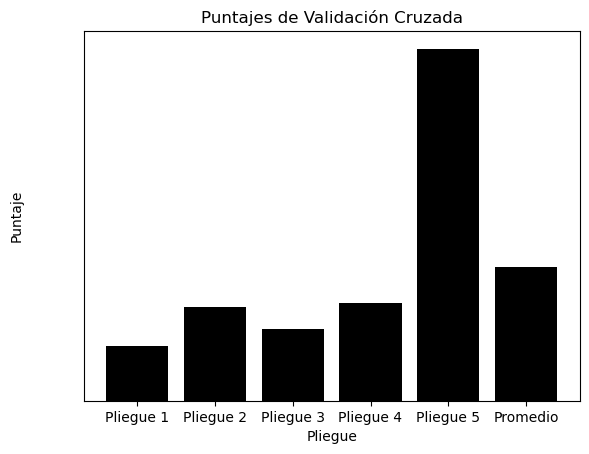

In [45]:

# Crear una lista de nombres para los pliegues
nombres_pliegues = [f'Pliegue {i+1}' for i in range(len(cv_scores))]

# Agregar el promedio a la lista de nombres
nombres_pliegues.append('Promedio')

# Crear una lista de valores para los puntajes
valores_puntajes = list(cv_scores) + [cv_scores.mean()]


# Crear un gráfico de barras para visualizar los puntajes
fig, ax = plt.subplots(facecolor='white')  # Cambia el color de fondo aquí

# Agregar el gráfico de barras
ax.bar(nombres_pliegues, valores_puntajes, color='black')  # Cambia el color de las barras aquí

# Añadir etiquetas
plt.xlabel('Pliegue')
plt.ylabel('Puntaje')
plt.title('Puntajes de Validación Cruzada')


# Cambiar el color del texto y las líneas del gráfico
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='white')

# Mostrar el gráfico
plt.show()


# Conclusion
Los datos de validacion nos indican que el modelo no es capaz de describir la tarifa de los viajes en taxi de una manera eficiente. Es util notal que los plots muestran que se sigue cierta tendencia lineal sin embargo el modelo lineal no es muy efectivo dado que, hablando de dinero, si hacemos una comparacion de error un poco precipitada, un 24% de error traducido en dinero en el contexto de las tarifas de taxis en una cuidad como new york es demasiada perdida.
Se concluye que el modelo tiene metricas no aceptables dado que fallaria en casos de uso practico ademas de tener una precisión demasiado baja. 
En general se podrian realizar otros ajustes o metodos para generar mejoras en el modelo estadistico pero habria que evaluar si la modificación merece la pena con los resultados posibles. 